### Homework 2 : Emotion Classification

name: Neng XU

e-mail: neng.xu@ensta-paris.fr

#### 1. **Introduction**
The objective of this project is to classify human emotions using facial images. Emotions such as *angry*, *disgust*, *fear*, *happy*, *neutral*, *sad*, and *surprise* are recognized from grayscale facial images. The dataset was split into a training and testing set, and model performance was evaluated through accuracy and confusion matrix analysis.

In the first part, the classification task was performed using a K-Nearest Neighbors (KNN) algorithm trained on Local Binary Pattern (LBP) features extracted from the images. 

In the second part, the classification task was performed using a Convolution Neural Network (CNN).

#### 2. **Dataset and Preprocessing**
The dataset contains images organized into folders by emotion labels. Each image is converted into grayscale if not already and resized to 48*48 pixels to ensure uniformity across the dataset. 

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import StandardScaler

In [2]:
train_dir = './dataset/train'
test_dir = './dataset/test'

# Define emotion labels
emotion_labels = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "neutral": 4,
    "sad": 5,
    "surprise": 6
}

**LBP Feature Extraction**: 
Each image is processed using Local Binary Pattern (LBP) to extract texture features, which are then used as input to the classifier. The LBP is a simple yet effective texture descriptor, and a normalized histogram of LBP values is created to represent each image.

In [3]:
def load_images_and_extract_features(directory, percentage=100):
    X = []
    y = []
    
    for emotion, label in emotion_labels.items():
        folder_path = os.path.join(directory, emotion)
        image_files = [f for f in os.listdir(folder_path) if f.endswith(".jpg")]
        
        # Select a subset of the dataset
        num_images_to_load = int(len(image_files) * (percentage / 100))
        selected_images = image_files[:num_images_to_load]

        for file in selected_images:
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale
            
            if image.shape != (48, 48):
                image = cv2.resize(image, (48, 48))
            
            lbp_features = extract_lbp_features(image)
            
            X.append(lbp_features)
            y.append(label)
    
    return np.array(X), np.array(y)


# LBP feature extraction function
def extract_lbp_features(image, radius=1, n_points=8):
    lbp = local_binary_pattern(image, n_points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3),
                             range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)  # Normalize the histogram
    return hist

#### 3. **K-Nearest Neighbors (KNN) algorithm**
The K-Nearest Neighbors (KNN) algorithm was chosen for its simplicity and effectiveness in classification tasks. The number of neighbors (`n_neighbors`) was set to 3. The dataset was split into a 50% training set and 50% test set to train and evaluate the model.

**Normalization**: 
Since the LBP feature vectors may have different scales, the features were normalized using `StandardScaler` to improve KNN performance.

In [4]:
X_train, y_train = load_images_and_extract_features(train_dir, percentage=100)
X_test, y_test = load_images_and_extract_features(test_dir, percentage=100)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### 4. **KNN Results**

##### 4.1 Accuracy and Classification Report
After training the KNN classifier on the training set, predictions were made on the test set.

In [5]:
# Evaluate the model
y_pred = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.21607690164391194
              precision    recall  f1-score   support

           0       0.18      0.37      0.24       958
           1       0.15      0.25      0.19       111
           2       0.17      0.23      0.19      1024
           3       0.27      0.28      0.27      1774
           4       0.22      0.13      0.16      1233
           5       0.21      0.09      0.13      1247
           6       0.35      0.20      0.26       831

    accuracy                           0.22      7178
   macro avg       0.22      0.22      0.21      7178
weighted avg       0.23      0.22      0.21      7178



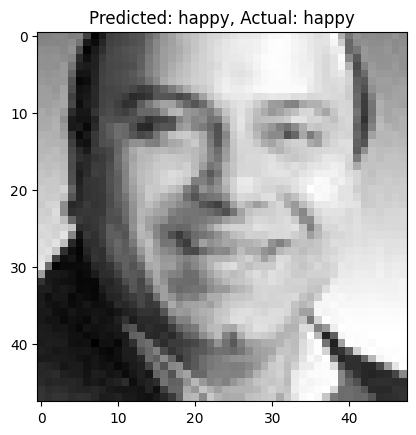

In [6]:
def show_image_and_prediction(image_path, true_label):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image.shape != (48, 48):
        image = cv2.resize(image, (48, 48))
    
    lbp_features = extract_lbp_features(image)
    
    # Predict using KNN
    pred_label = knn.predict([lbp_features])[0]
    
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {list(emotion_labels.keys())[pred_label]}, Actual: {true_label}")
    plt.show()

test_image_path = os.path.join(test_dir, "happy", "PrivateTest_2569530.jpg")  # Replace with actual image
show_image_and_prediction(test_image_path, "happy")

##### 4.2 Confusion Matrix
A confusion matrix was generated to provide further insight into the model's performance. This matrix allows us to visualize the number of correct and incorrect classifications for each emotion category.

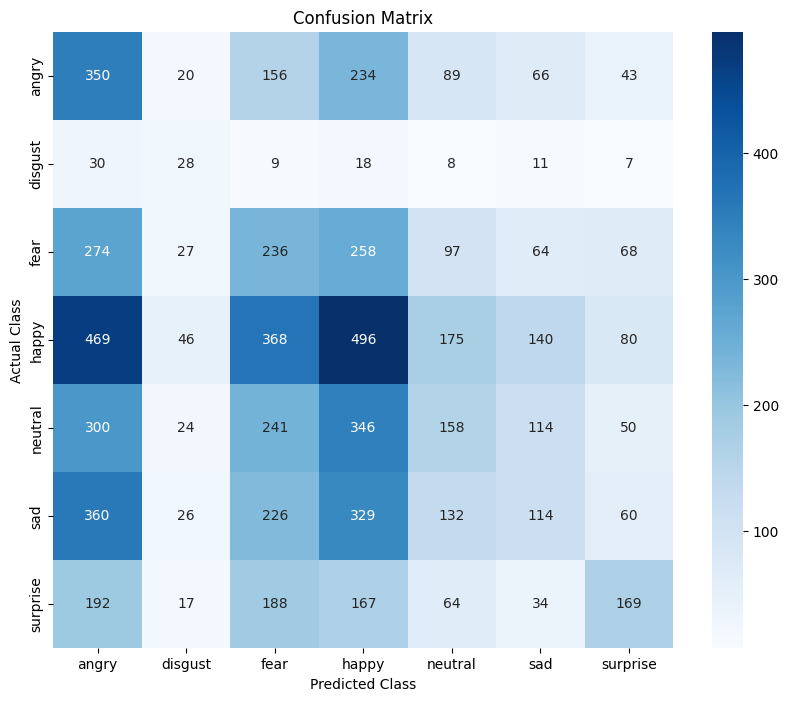

In [7]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title('Confusion Matrix')
    plt.show()

emotion_names = list(emotion_labels.keys())
plot_confusion_matrix(y_test, y_pred, emotion_names)

The confusion matrix shows the performance of the classifier across different emotion classes. Key observations include:

1. **Happy class**: The model performs relatively well in recognizing the "Happy" emotion, with 105 correct predictions, which is better than other emotions.
2. **Angry, Fear and Neutral classes**: These classes are frequently confused with each other. Many instances of "Angry" are classified as "Happy", "Fear" and "Neutral", and vice versa. This suggests the model struggles to differentiate these expressions.
3. **Disgust class**: The model performs poorly for "Disgust," with very few correct predictions. This is likely due to class imbalance or the subtle nature of this emotion.
4. **Overall confusion**: There’s considerable confusion between similar emotional categories like "Sad" and "Surprise". The model does not clearly distinguish between these closely related expressions.

In summary, the model shows some capacity for recognizing certain emotions like "Happy" but struggles significantly with others, particularly "Disgust" and emotions that are visually similar.

#### 5. **KNN's Challenges and Observations**
- **Confusion between Similar Emotions**: Emotions like *angry*, *fear* and *happy*, can be visually similar in certain facial expressions, leading to misclassification. The confusion matrix highlights these trends.
- **Disproportionate Data**: Some emotions, such as *disgust*, might have fewer training samples compared to others, leading to underperformance for those categories.
- **Feature Selection**: LBP is an effective texture-based descriptor, but it might not capture more nuanced expressions in facial images that depend on subtle intensity variations.

#### 6. **Emotion Classification using a CNN Model**
This part involves building a Convolutional Neural Network (CNN) to classify emotions from facial expressions. We preprocess the data, define a CNN model, train it using a labeled dataset, and evaluate the model's performance on test data.

##### 6.1 Data Preprocessing
The images are preprocessed before being fed into the model. Key preprocessing steps include:

1. **Grayscale conversion**: All images are converted to grayscale using `transforms.Grayscale` as emotion classification generally does not require color information.
2. **Resizing**: Each image is resized to a fixed size of 48x48 pixels using `transforms.Resize`, ensuring uniform input dimensions for the network.
3. **Normalization**: The pixel values are normalized to a range of `[-1, 1]` using `transforms.Normalize`, which speeds up convergence during training.

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

train_dir = './dataset/train'
test_dir = './dataset/test'

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Generate labels from folder names
print(f"Classes found: {train_dataset.classes}")

Classes found: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


##### 6.2 Defining the CNN Model

A custom CNN architecture, `EmotionCNN`, is defined. The model consists of:

- Two convolutional layers, each followed by ReLU activations and max pooling layers.
- Fully connected layers for final classification.

The forward propagation includes ReLU activation functions and max pooling to reduce spatial dimensions.

In [9]:
class EmotionCNN(nn.Module):
    def __init__(self):
        super(EmotionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, len(train_dataset.classes))  # Dynamically set output classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

##### 6.3 Loss Function and Optimizer
- **Loss Function**: Cross-entropy loss (`nn.CrossEntropyLoss`) is used because it's well-suited for multi-class classification tasks.
- **Optimizer**: Adam optimizer (`optim.Adam`) is employed for its adaptive learning capabilities, with an initial learning rate of `0.001`.

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)
model = EmotionCNN().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def save_model(model, path='./model/emotion_cnn.pth'):
    torch.save(model.state_dict(), path)
    print(f"Model saved to {path}")

def load_model(model, path='./model/emotion_cnn.pth'):
    if os.path.exists(path):
        model.load_state_dict(torch.load(path))
        model.eval()  # Set to evaluation mode
        print(f"Model loaded from {path}")
    else:
        print(f"No model found at {path}")

Device:  cuda


##### 6.4 Training and Evaluating the Model

In each traning epoch:

1. The model performs forward propagation to predict outputs.
2. The loss is calculated using the predicted outputs and actual labels.
3. Backpropagation is performed to update model parameters.

During evaluation, no gradient computations are performed, which speeds up the process. The model’s accuracy is calculated as the percentage of correctly predicted labels.

In [11]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=20):
    model.train()  # Set model to training mode
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

    save_model(model)

def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            all_preds.extend(predicted.cpu().numpy())  # Collect predictions
            all_labels.extend(labels.cpu().numpy())    # Collect true labels
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    
    return all_labels, all_preds

##### 6.5 Running the Program

The main function determines whether to train or evaluate the model based on the mode provided. The model can be trained from scratch or evaluated using a previously trained model.

In [12]:
def main(mode='train'):
    if mode == 'train':
        print("Training started.")
        train_model(model, train_loader, criterion, optimizer, num_epochs=20)
    elif mode == 'evaluate':
        # Load previously trained model
        load_model(model)
        print("Model loaded.")
        evaluate_model(model, test_loader)
    else:
        print("Invalid mode. Please choose 'train' or 'evaluate'.")

# -------------------- MAIN -------------------- #
# main(mode='train')  # Train the model
main(mode='evaluate')  # Test the model

Model loaded from ./model/emotion_cnn.pth
Model loaded.
Test Accuracy: 52.37%


##### 6.6 Plot the Confusion Matrix

Test Accuracy: 52.37%


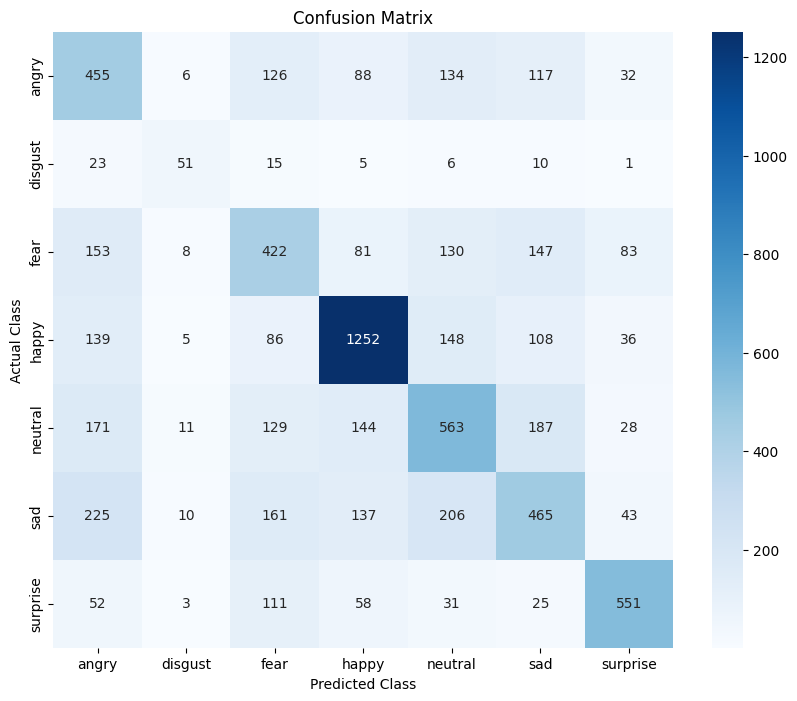

In [13]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title('Confusion Matrix')
    plt.show()

emotion_names = train_dataset.classes
y_test, y_pred = evaluate_model(model, test_loader)
plot_confusion_matrix(y_test, y_pred, emotion_names)

The CNN model performs better than KNN for several key reasons:

1. **Feature Extraction**: CNNs automatically learn spatial hierarchies of features through convolutional layers, which are particularly effective for image data. In contrast, KNN uses raw pixel values and lacks the ability to extract meaningful features, making it less effective for complex image patterns.

2. **Parameter Efficiency**: CNNs share weights across the image, reducing the number of parameters and capturing local patterns like edges, textures, and shapes. KNN does not leverage such localized features and treats all pixels equally.

3. **Scalability**: CNNs are more scalable to large datasets, as they reduce dimensionality through pooling and use backpropagation for optimization. KNN, on the other hand, becomes computationally expensive and slower as dataset size increases, since it requires distance calculations with every sample.

Overall, CNN's ability to learn complex features from images gives it a clear advantage over KNN in image classification tasks.